<a href="https://colab.research.google.com/github/baut-jc/DDC-DSCapstone18/blob/main/EV%20Stations/Capstone_EVstations_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EV Charging

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

## Data Collection/Sources


In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning


In [229]:
url = "https://developer.nrel.gov/api/alt-fuel-stations/v1.csv?access=all&api_key=BTjBgth23foa0fxXRfHBSe0nMZCxRdXYzCHGhOYi&country=US&download=true&fuel_type=ELEC&state=NM&status=all"

In [230]:
ev_data = pd.read_csv(url)
pd.set_option('display.max_columns', None)  # Show all columns
ev_data

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Inn at Santa Fe,8376 Cerrillos Rd,NaN,Santa Fe,NM,87507,NaN,505-474-9500,E,NaN,Public,24 hours daily; hotel customers only; Drivers ...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Non-Networked,NaN,GPS,35.612290,-106.032300,2022-08-10,46893,2024-12-23 16:52:59 UTC,P,NaN,NaN,2012-05-12,NaN,NaN,NaN,NaN,NEMA520,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,INN,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,ELEC,City of Santa Fe - Railyard Parking Garage,503 Camino de la Familia,2nd and 3rd space to the left as you drive in,Santa Fe,NM,87501,NaN,505-955-6581,E,NaN,Public,"Garage business hours; PayPal, Google Pay",APPLE_PAY CREDIT Debit,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,GPS,35.684510,-105.948000,2025-01-13,48864,2025-02-12 00:16:32 UTC,LG,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49915,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,CHADEMO J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49916,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [231]:
ev_data.shape

(438, 75)

In [232]:
ev_data.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Inn at Santa Fe,8376 Cerrillos Rd,NaN,Santa Fe,NM,87507,NaN,505-474-9500,E,NaN,Public,24 hours daily; hotel customers only; Drivers ...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Non-Networked,NaN,GPS,35.612290,-106.032300,2022-08-10,46893,2024-12-23 16:52:59 UTC,P,NaN,NaN,2012-05-12,NaN,NaN,NaN,NaN,NEMA520,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,INN,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,ELEC,City of Santa Fe - Railyard Parking Garage,503 Camino de la Familia,2nd and 3rd space to the left as you drive in,Santa Fe,NM,87501,NaN,505-955-6581,E,NaN,Public,"Garage business hours; PayPal, Google Pay",APPLE_PAY CREDIT Debit,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,GPS,35.684510,-105.948000,2025-01-13,48864,2025-02-12 00:16:32 UTC,LG,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49915,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,CHADEMO J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49916,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN


In [282]:
ev_data.tail()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
433,ELEC,KLF 1 STATION # 2,318 Elm Street Southeast,Parking Lot,Albuquerque,NM,87102,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,35.080159,-106.638751,2025-07-30,405394,2025-07-30 02:56:21 UTC,NaN,NaN,NaN,2025-07-04,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
434,ELEC,Comfort Inn & Suites - T or C,2205 N Date St,NaN,Truth or Consequences,NM,87901,NaN,1-800-489-1588,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,FCN,https://francisenergy.com,GPS,33.156351,-107.249042,2025-07-30,416301,2025-07-30 04:01:45 UTC,NaN,NaN,NaN,2025-07-16,NaN,NaN,NaN,NaN,J1772COMBO,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
435,ELEC,Tays Event Center,2400 N Scenic Dr,NaN,Alamogordo,NM,88310,NaN,844-584-2329,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,GPS,32.917378,-105.928551,NaT,416747,2025-07-24 13:25:32 UTC,P,NaN,NaN,2024-09-19,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,PARKING_LOT,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SOLAR,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
436,ELEC,Chalmers Ford,2500 Rio Rancho Blvd SE,NaN,Rio Rancho,NM,87124,NaN,1-888-357-1009,E,NaN,Public,24 hours daily,A ANDROID_PAY APPLE_PAY CREDIT D Debit M V,NaN,NaN,NaN,NaN,NaN,4.0,NaN,FORD_CHARGE,https://www.ford.com/support/category/electric...,GPS,35.214400,-106.661678,2025-07-30,416854,2025-07-30 05:16:58 UTC,NaN,NaN,NaN,2025-04-25,NaN,NaN,NaN,NaN,J1772COMBO,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,PUBLIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
437,ELEC,COPPERSTONE 1 SITE 1-2,501 Roadrunner Parkway,NaN,Las Cruces,NM,88011,NaN,888-758-4389,T,2025-07-30,TEMPORARILY UNAVAILABLE (Public),24 hours daily,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,32.327852,-106.743243,2025-07-30,417254,2025-07-30 02:56:45 UTC,NaN,NaN,NaN,2025-07-30,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,TEMPORAIREMENT SUSPENDU (Public),NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [233]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 75 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Fuel Type Code                           438 non-null    object 
 1   Station Name                             438 non-null    object 
 2   Street Address                           438 non-null    object 
 3   Intersection Directions                  166 non-null    object 
 4   City                                     438 non-null    object 
 5   State                                    438 non-null    object 
 6   ZIP                                      438 non-null    int64  
 7   Plus4                                    0 non-null      float64
 8   Station Phone                            425 non-null    object 
 9   Status Code                              438 non-null    object 
 10  Expected Date                            21 non-nu

In [234]:
ev_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ZIP,438.0,87515.121005,412.040928,87004.000000,87111.000000,87505.000000,87923.500000,88435.000000
Plus4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BD Blends,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NG Fill Type Code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NG PSI,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EV Level1 EVSE Num,3.0,3.000000,3.464102,1.000000,1.000000,1.000000,4.000000,7.000000
EV Level2 EVSE Num,290.0,2.055172,1.514768,1.000000,1.000000,2.000000,2.000000,20.000000
EV DC Fast Count,148.0,3.202703,2.946137,1.000000,1.000000,2.000000,4.000000,16.000000
EV Other Info,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,438.0,34.856447,1.286997,31.830388,34.850585,35.135422,35.662017,36.902166


In [235]:
# check for nulls
ev_data.isnull().sum()

,0
Fuel Type Code,0
Station Name,0
Street Address,0
Intersection Directions,272
City,0
...,...
CNG Station Sells Renewable Natural Gas,438
LNG Station Sells Renewable Natural Gas,438
Maximum Vehicle Class,385
EV Workplace Charging,0


In [236]:
null_ratios = ev_data.isnull().mean()
dropped_cols = null_ratios[null_ratios >= 0.3].index.tolist()
print("Dropped columns (≥ 30% nulls):", dropped_cols)
ev_dropped = ev_data.drop(columns=dropped_cols)


Dropped columns (≥ 30% nulls): ['Intersection Directions', 'Plus4', 'Expected Date', 'Cards Accepted', 'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name', 'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump', 'Intersection Directions (French)', 'Access Days Time (French)', 'BD Blends (French)', 'Hydrogen Is Retail', 'Access Detail Code', 'Federal Agency Code', 'Facility Type', 'CNG Dispenser Num', 'CNG On-Site Renewable Source', 'CNG Total Compression Capacity', 'CNG Storage Capacity', 'LNG On-Site Renewable Source', 'E85 Other Ethanol Blends', 'EV Pricing', 'EV Pricing (French)', 'LPG Nozzle Types', 'Hydrogen Pressures', 'Hydrogen Standards', 'CNG Fill Type Code', 'CNG PSI', 'CNG Vehicle Class', 'LNG Vehicle Class', 'EV On-Site Renewable Source', 'Restricted Access', 'RD Blends', 'RD Blends (French)', 'RD Blended with Biodiese

In [237]:
# convert dates
ev_data['Open Date'] = pd.to_datetime(ev_data['Open Date'], errors='coerce')
ev_data['Date Last Confirmed'] = pd.to_datetime(ev_data['Date Last Confirmed'], errors='coerce')


In [238]:
ev_clean = ev_data.copy()
ev_clean

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Inn at Santa Fe,8376 Cerrillos Rd,NaN,Santa Fe,NM,87507,NaN,505-474-9500,E,NaN,Public,24 hours daily; hotel customers only; Drivers ...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Non-Networked,NaN,GPS,35.612290,-106.032300,2022-08-10,46893,2024-12-23 16:52:59 UTC,P,NaN,NaN,2012-05-12,NaN,NaN,NaN,NaN,NEMA520,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,INN,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,ELEC,City of Santa Fe - Railyard Parking Garage,503 Camino de la Familia,2nd and 3rd space to the left as you drive in,Santa Fe,NM,87501,NaN,505-955-6581,E,NaN,Public,"Garage business hours; PayPal, Google Pay",APPLE_PAY CREDIT Debit,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Non-Networked,NaN,GPS,35.684510,-105.948000,2025-01-13,48864,2025-02-12 00:16:32 UTC,LG,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,MUNI_GOV,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49915,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,CHADEMO J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,ELEC,Fiesta Nissan,2005 St Michaels Dr,NaN,Santa Fe,NM,87505,NaN,505-955-1000,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-9,35.659801,-105.966558,2024-02-12,49916,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [287]:
filter = ev_clean['EV Connector Types'] == 'TESLA'

In [290]:
ev_clean[filter]

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
17,ELEC,Applebee's - Tesla Supercharger,2600 Menaul Blvd NE,NaN,Albuquerque,NM,87107,NaN,877-798-3752,E,NaN,Public,24 hours daily. Please check Tesla's online st...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,Tesla,https://www.tesla.com/supercharger,200-9,35.108486,-106.612804,2024-07-01,102302,2025-05-06 21:07:47 UTC,P,NaN,NaN,2015-08-01,NaN,NaN,NaN,NaN,TESLA,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
18,ELEC,Marriott TownePlace Suites Farmington - Tesla ...,4200 Sierra Vista Drive,NaN,Farmington,NM,87402,NaN,877-798-3752,E,NaN,Public,24 hours daily. Please check Tesla's online st...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,Tesla,https://www.tesla.com/supercharger,200-8,36.766315,-108.144266,2024-07-01,102304,2025-05-06 21:07:47 UTC,P,NaN,NaN,2014-01-01,NaN,NaN,NaN,NaN,TESLA,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
19,ELEC,Best Western Gallup West - Tesla Supercharger,111 Twin Buttes Rd,NaN,Gallup,NM,87301,NaN,877-798-3752,E,NaN,Public,24 hours daily. Please check Tesla's online st...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,Tesla,https://www.tesla.com/supercharger,200-8,35.505278,-108.828094,2024-07-01,102305,2025-05-06 21:07:47 UTC,P,NaN,NaN,2014-01-01,NaN,NaN,NaN,NaN,TESLA,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
20,ELEC,Comfort Inn - Tesla Supercharger,2500 N. Grand Ave.,NaN,Las Vegas,NM,87701,NaN,877-798-3752,E,NaN,Public,24 hours daily. Please check Tesla's online st...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,Tesla,https://www.tesla.com/supercharger,200-9,35.622048,-105.205417,2024-07-01,102306,2025-05-06 21:07:47 UTC,P,NaN,NaN,2015-08-01,NaN,NaN,NaN,NaN,TESLA,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
21,ELEC,Fashion Outlets of Santa Fe - Tesla Supercharger,8380 Cerrillos Rd,NaN,Santa Fe,NM,87507,NaN,877-798-3752,E,NaN,Public,24 hours daily. Please check Tesla's online st...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,Tesla,https://www.tesla.com/supercharger,200-8,35.611872,-106.031442,2024-07-01,102307,2025-05-06 21:07:47 UTC,P,NaN,NaN,2017-09-01,NaN,NaN,NaN,NaN,TESLA,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
22,ELEC,Holiday Inn Express Santa Rosa - Tesla Superch...,2516 Historic Route 66,NaN,Santa Rosa,NM,88435,NaN,87

In [239]:
ev_ABQ = ev_clean[ev_clean['City'] == 'Albuquerque']
ev_ABQ

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
4,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
5,ELEC,Melloy Nissan,7707 Lomas Blvd,NaN,Albuquerque,NM,87110,NaN,505-265-8721,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49921,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
6,ELEC,Reliable Nissan,9951 Coors Blvd NW,NaN,Albuquerque,NM,87114,NaN,505-435-9825,E,NaN,Public - Call ahead,Dealership business hours,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.193238,-106.655819,2024-02-12,49922,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public - Appeler à l'avance,NaN,public,CALL,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
7,ELEC,Reliable Nissan,9951 Coors Blvd NW,NaN,Albuquerque,NM,87114,NaN,505-435-9825,E,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Non-Networked,NaN,200-8,35.193238,-106.655819,2024-02-12,49923,2025-02-12 00:16:32 UTC,P,NaN,NaN,2012-10-25,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,CAR_DEALER,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
8,ELEC,UNM CORNELL 1,2401 Redondo S Dr,"Cornell Parking Structure, Level 4",Albuquerque,NM,87106,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,https://www.chargepoint.com,GPS,35.081831,-106.619140,2025-07-30,75367,2025-07-30 01:04:58 UTC,NaN,NaN,NaN,2016-04-23,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,ELEC,LA VIDA LLENA STATION - 1,10501 Lagrima De Oro Road Northeast,Nort

In [240]:
ev_ABQ = ev_ABQ.loc[:, ev_data.isnull().mean() <0.3]
ev_ABQ

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,Access Days Time,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Open Date,EV Connector Types,Country,Groups With Access Code (French),Access Code,EV Workplace Charging
4,ELEC,Melloy Nissan,7707 Lomas Blvd,Albuquerque,NM,87110,505-265-8721,E,Public - Call ahead,Dealership business hours,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Public - Appeler à l'avance,public,False
5,ELEC,Melloy Nissan,7707 Lomas Blvd,Albuquerque,NM,87110,505-265-8721,E,Private,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49921,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Privé,private,False
6,ELEC,Reliable Nissan,9951 Coors Blvd NW,Albuquerque,NM,87114,505-435-9825,E,Public - Call ahead,Dealership business hours,Non-Networked,NaN,200-8,35.193238,-106.655819,2024-02-12,49922,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Public - Appeler à l'avance,public,False
7,ELEC,Reliable Nissan,9951 Coors Blvd NW,Albuquerque,NM,87114,505-435-9825,E,Private,NaN,Non-Networked,NaN,200-8,35.193238,-106.655819,2024-02-12,49923,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Privé,private,False
8,ELEC,UNM CORNELL 1,2401 Redondo S Dr,Albuquerque,NM,87106,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.081831,-106.619140,2025-07-30,75367,2025-07-30 01:04:58 UTC,2016-04-23,J1772,US,Public,public,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,ELEC,LA VIDA LLENA STATION - 1,10501 Lagrima De Oro Road Northeast,Albuquerque,NM,87111,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.134242,-106.522115,2025-07-30,395930,2025-07-30 02:53:49 UTC,2025-05-20,J1772,US,Public,public,False
411,ELEC,LA VIDA LLENA STATION - 3,10501 Lagrima De Oro Road Northeast,Albuquerque,NM,87111,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.134280,-106.522044,2025-07-30,395940,2025-07-30 02:53:59 UTC,2025-05-20,J1772,US,Public,public,False
412,ELEC,LA VIDA LLENA STATION - 2,10501 Lagrima De Oro Road Northeast,Albuquerque,NM,87111,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.134243,-106.522100,2025-07-30,395941,2025-07-30 02:53:59 UTC,2025-05-20,J1772,US,Public,public,False
432,ELEC,KLF 1 STATION # 1,318 Elm Street Southeast,Albuquerque,NM,87102,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.080159,-106.638761,2025-07-30,405393,2025-07-30 02:56:21 UTC,2025-07-04,J1772,US,Public,public,False


In [241]:
ev_clean_ABQ = ev_ABQ.copy()
ev_clean_ABQ

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,Access Days Time,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Open Date,EV Connector Types,Country,Groups With Access Code (French),Access Code,EV Workplace Charging
4,ELEC,Melloy Nissan,7707 Lomas Blvd,Albuquerque,NM,87110,505-265-8721,E,Public - Call ahead,Dealership business hours,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Public - Appeler à l'avance,public,False
5,ELEC,Melloy Nissan,7707 Lomas Blvd,Albuquerque,NM,87110,505-265-8721,E,Private,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49921,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Privé,private,False
6,ELEC,Reliable Nissan,9951 Coors Blvd NW,Albuquerque,NM,87114,505-435-9825,E,Public - Call ahead,Dealership business hours,Non-Networked,NaN,200-8,35.193238,-106.655819,2024-02-12,49922,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Public - Appeler à l'avance,public,False
7,ELEC,Reliable Nissan,9951 Coors Blvd NW,Albuquerque,NM,87114,505-435-9825,E,Private,NaN,Non-Networked,NaN,200-8,35.193238,-106.655819,2024-02-12,49923,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Privé,private,False
8,ELEC,UNM CORNELL 1,2401 Redondo S Dr,Albuquerque,NM,87106,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.081831,-106.619140,2025-07-30,75367,2025-07-30 01:04:58 UTC,2016-04-23,J1772,US,Public,public,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,ELEC,LA VIDA LLENA STATION - 1,10501 Lagrima De Oro Road Northeast,Albuquerque,NM,87111,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.134242,-106.522115,2025-07-30,395930,2025-07-30 02:53:49 UTC,2025-05-20,J1772,US,Public,public,False
411,ELEC,LA VIDA LLENA STATION - 3,10501 Lagrima De Oro Road Northeast,Albuquerque,NM,87111,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.134280,-106.522044,2025-07-30,395940,2025-07-30 02:53:59 UTC,2025-05-20,J1772,US,Public,public,False
412,ELEC,LA VIDA LLENA STATION - 2,10501 Lagrima De Oro Road Northeast,Albuquerque,NM,87111,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.134243,-106.522100,2025-07-30,395941,2025-07-30 02:53:59 UTC,2025-05-20,J1772,US,Public,public,False
432,ELEC,KLF 1 STATION # 1,318 Elm Street Southeast,Albuquerque,NM,87102,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.080159,-106.638761,2025-07-30,405393,2025-07-30 02:56:21 UTC,2025-07-04,J1772,US,Public,public,False


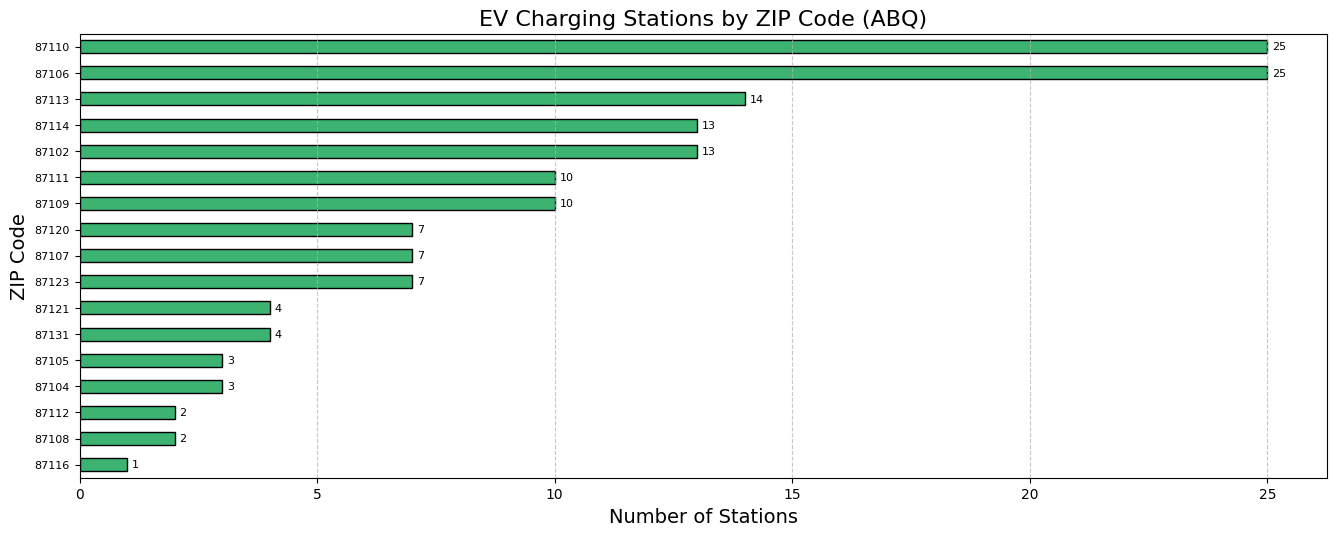

In [242]:
import matplotlib.pyplot as plt

zip_counts = ev_clean_ABQ['ZIP'].value_counts()

plt.figure(figsize=(14, max(6, len(zip_counts) * 0.15)))  # Height scales with number of ZIPs
ax = zip_counts.plot(kind='barh', color='mediumseagreen', edgecolor='black')

plt.title('EV Charging Stations by ZIP Code (ABQ)', fontsize=16)
plt.xlabel('Number of Stations', fontsize=14)
plt.ylabel('ZIP Code', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8)  # Smaller font if many ZIPs
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3)
plt.gca().invert_yaxis()  # Largest on top

# Add station count labels on bars
for i, v in enumerate(zip_counts):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=8)

plt.show()

### Extraction of Open Year

In [243]:
# Now you can safely extract the year
ev_clean_ABQ['Open Year'] = ev_clean_ABQ['Open Date'].dt.year


In [244]:
ev_clean_ABQ

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,Access Days Time,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Open Date,EV Connector Types,Country,Groups With Access Code (French),Access Code,EV Workplace Charging,Open Year
4,ELEC,Melloy Nissan,7707 Lomas Blvd,Albuquerque,NM,87110,505-265-8721,E,Public - Call ahead,Dealership business hours,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49920,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Public - Appeler à l'avance,public,False,2012.0
5,ELEC,Melloy Nissan,7707 Lomas Blvd,Albuquerque,NM,87110,505-265-8721,E,Private,NaN,Non-Networked,NaN,200-8,35.087920,-106.562060,2024-02-12,49921,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Privé,private,False,2012.0
6,ELEC,Reliable Nissan,9951 Coors Blvd NW,Albuquerque,NM,87114,505-435-9825,E,Public - Call ahead,Dealership business hours,Non-Networked,NaN,200-8,35.193238,-106.655819,2024-02-12,49922,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Public - Appeler à l'avance,public,False,2012.0
7,ELEC,Reliable Nissan,9951 Coors Blvd NW,Albuquerque,NM,87114,505-435-9825,E,Private,NaN,Non-Networked,NaN,200-8,35.193238,-106.655819,2024-02-12,49923,2025-02-12 00:16:32 UTC,2012-10-25,J1772,US,Privé,private,False,2012.0
8,ELEC,UNM CORNELL 1,2401 Redondo S Dr,Albuquerque,NM,87106,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.081831,-106.619140,2025-07-30,75367,2025-07-30 01:04:58 UTC,2016-04-23,J1772,US,Public,public,False,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,ELEC,LA VIDA LLENA STATION - 1,10501 Lagrima De Oro Road Northeast,Albuquerque,NM,87111,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.134242,-106.522115,2025-07-30,395930,2025-07-30 02:53:49 UTC,2025-05-20,J1772,US,Public,public,False,2025.0
411,ELEC,LA VIDA LLENA STATION - 3,10501 Lagrima De Oro Road Northeast,Albuquerque,NM,87111,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.134280,-106.522044,2025-07-30,395940,2025-07-30 02:53:59 UTC,2025-05-20,J1772,US,Public,public,False,2025.0
412,ELEC,LA VIDA LLENA STATION - 2,10501 Lagrima De Oro Road Northeast,Albuquerque,NM,87111,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.134243,-106.522100,2025-07-30,395941,2025-07-30 02:53:59 UTC,2025-05-20,J1772,US,Public,public,False,2025.0
432,ELEC,KLF 1 STATION # 1,318 Elm Street Southeast,Albuquerque,NM,87102,888-758-4389,E,Public,24 hours daily,ChargePoint Network,https://www.chargepoint.com,GPS,35.080159,-106.638761,2025-07-30,405393,2025-07-30 02:56:21 UTC,2025-07-04,J1772,US,Public,public,False,2025.0


### Make new data frame with only columns needed for now.

In [245]:
ev_zip_ABQ = ev_clean_ABQ[['ZIP', 'Status Code', 'Latitude', 'Longitude', 'EV Connector Types', 'Open Year']]
ev_zip_ABQ

,ZIP,Status Code,Latitude,Longitude,EV Connector Types,Open Year
4,87110,E,35.087920,-106.562060,J1772,2012.0
5,87110,E,35.087920,-106.562060,J1772,2012.0
6,87114,E,35.193238,-106.655819,J1772,2012.0
7,87114,E,35.193238,-106.655819,J1772,2012.0
8,87106,E,35.081831,-106.619140,J1772,2016.0
...,...,...,...,...,...,...
410,87111,E,35.134242,-106.522115,J1772,2025.0
411,87111,E,35.134280,-106.522044,J1772,2025.0
412,87111,E,35.134243,-106.522100,J1772,2025.0
432,87102,E,35.080159,-106.638761,J1772,2025.0


In [277]:
ev_zip_ABQ['EV Connector Types'].value_counts()

,count
EV Connector Types,
J1772,117
J1772COMBO,13
CHADEMO J1772COMBO,7
J1772 TESLA,6
TESLA,5
J1772 J1772COMBO,1
J1772COMBO TESLA,1


In [280]:
list(ev_zip_ABQ['EV Connector Types'].value_counts().index)

['J1772',
 'J1772COMBO',
 'CHADEMO J1772COMBO',
 'J1772 TESLA',
 'TESLA',
 'J1772 J1772COMBO',
 'J1772COMBO TESLA']

In [246]:
ev_zip_ABQ.isnull().sum()

,0
ZIP,0
Status Code,0
Latitude,0
Longitude,0
EV Connector Types,0
Open Year,3


In [247]:
ev_zip_ABQ['Status Code'].unique()

array(['E', 'T'], dtype=object)

In [248]:
ev_zip_ABQ['Status Code'].value_counts()

,count
Status Code,
E,145
T,5


T = Temporarily Unavailable

In [249]:
ev_zip_ABQ['Open Year'].value_counts().sort_index(ascending=True)


,count
Open Year,
2012.0,4
2014.0,1
2015.0,4
2016.0,3
2018.0,2
2019.0,3
2020.0,5
2021.0,19
2022.0,12


In [250]:
zip_list = ev_zip_ABQ['ZIP'].value_counts().index.tolist()
zip_list

[87110,
 87106,
 87113,
 87114,
 87102,
 87111,
 87109,
 87120,
 87107,
 87123,
 87121,
 87131,
 87105,
 87104,
 87112,
 87108,
 87116]

In [251]:
ev_zip_ABQ['ZIP'].value_counts().sort_index(ascending=True)

,count
ZIP,
87102,13
87104,3
87105,3
87106,25
87107,7
87108,2
87109,10
87110,25
87111,10


In [252]:
zip_year_counts = ev_zip_ABQ.groupby(['ZIP', 'Open Year']).size().reset_index(name='Total Stations')


In [253]:
zip_year_pivot = zip_year_counts.pivot(index='Open Year', columns='ZIP', values='Total Stations').fillna(0)


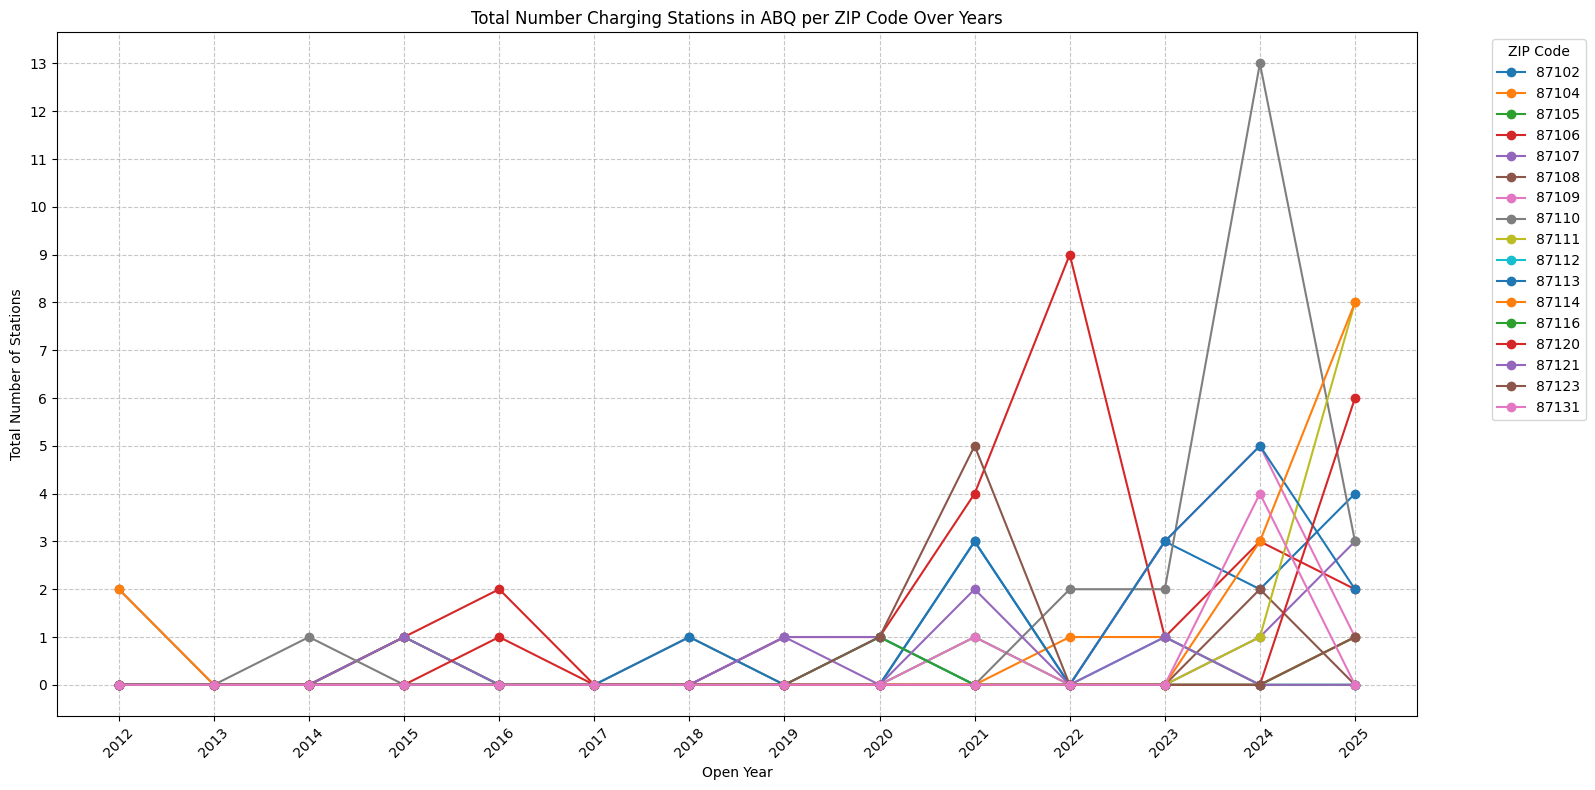

In [254]:
# Create full year range from 2012 to 2025
all_years = np.arange(2012, 2026)  # 2026 is exclusive, so this gives 2012–2025

# Reindex pivot_df to include all years (fill missing with 0)
pivot_df = pivot_df.reindex(all_years, fill_value=0)

pivot_df.plot(figsize=(16, 8), marker='o')

plt.title('Total Number Charging Stations in ABQ per ZIP Code Over Years')
plt.xlabel('Open Year')
plt.ylabel('Total Number of Stations')

# Show every integer on y-axis
plt.yticks(np.arange(0, int(pivot_df.values.max()) + 1, 1))

# Show every year on x-axis
plt.xticks(all_years, rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Legend and layout
plt.legend(title='ZIP Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [257]:
import pandas as pd
import plotly.express as px

# Group by ZIP and Open Year
zip_year_counts = ev_zip_ABQ.groupby(['ZIP', 'Open Year']).size().reset_index(name='Total Stations')

# Interactive line plot
fig = px.line(
    zip_year_counts,
    x='Open Year',
    y='Total Stations',
    color='ZIP',
    markers=True,
    hover_data={
        'ZIP': True,
        'Open Year': True,
        'Total Stations': True
    },
    title='EV Charging Stations in ABQ per ZIP Code Over Years'
)

fig.update_layout(
    xaxis_title="Open Year",
    yaxis_title="Total Number of Stations",
    legend_title="ZIP Code",
    hovermode="x unified"
)

fig.show()


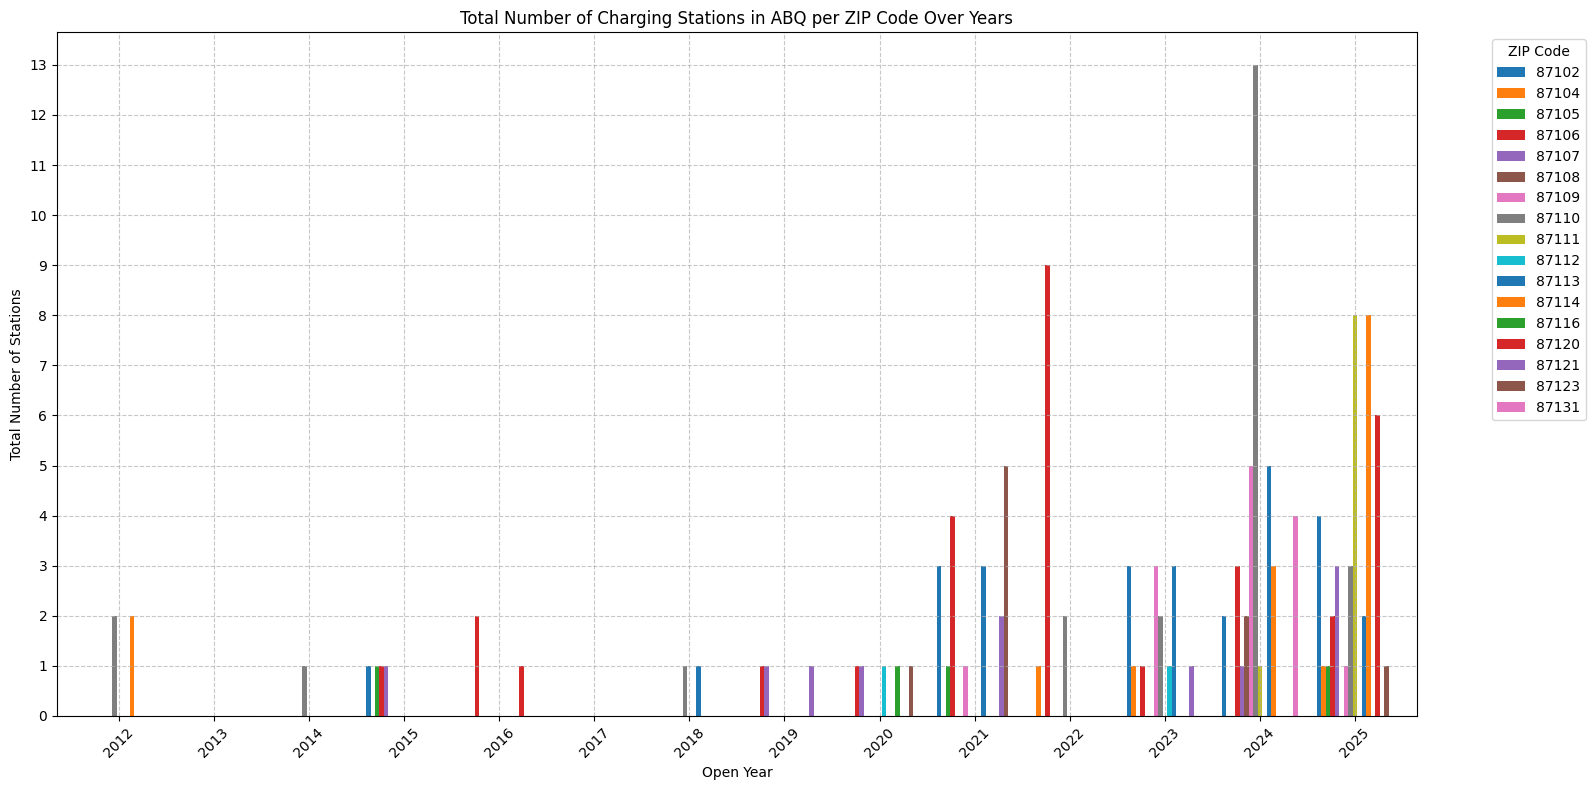

In [258]:
import matplotlib.pyplot as plt
import numpy as np

# Create full year range from 2012 to 2025
all_years = np.arange(2012, 2026)  # 2026 is exclusive

# Reindex pivot_df to include all years (fill missing with 0)
pivot_df = pivot_df.reindex(all_years, fill_value=0)

pivot_df.plot(kind='bar', figsize=(16, 8), width=0.8)

plt.title('Total Number of Charging Stations in ABQ per ZIP Code Over Years')
plt.xlabel('Open Year')
plt.ylabel('Total Number of Stations')

# To show all integers on x & y axis
plt.yticks(np.arange(0, int(pivot_df.values.max()) + 1, 1))
plt.xticks(ticks=np.arange(len(all_years)), labels=all_years, rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Legend and layout
plt.legend(title='ZIP Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


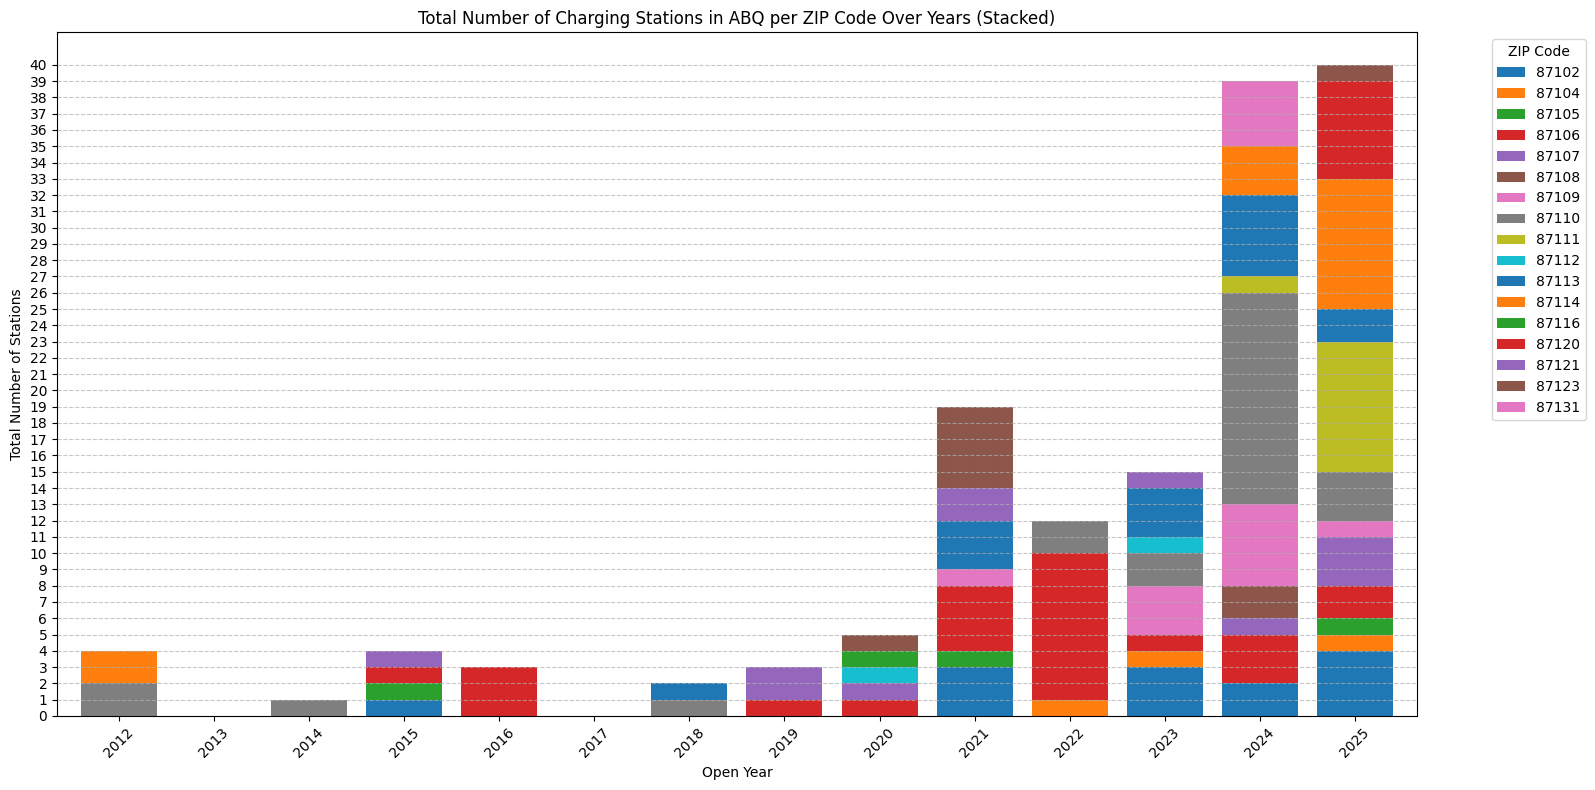

In [259]:
import matplotlib.pyplot as plt
import numpy as np

# Create full year range from 2012 to 2025
all_years = np.arange(2012, 2026)

# Reindex pivot_df to include all years (fill missing with 0)
pivot_df = pivot_df.reindex(all_years, fill_value=0)

pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 8),
    width=0.8
)

# Labels
plt.title('Total Number of Charging Stations in ABQ per ZIP Code Over Years (Stacked)')
plt.xlabel('Open Year')
plt.ylabel('Total Number of Stations')

# Shows all integers on x & y axis
plt.yticks(np.arange(0, int(pivot_df.values.sum(axis=1).max()) + 1, 1))
plt.xticks(ticks=np.arange(len(all_years)), labels=all_years, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='ZIP Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


## Exploratory Data Analysis


In [275]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from branca.colormap import linear

# Albuquerque ZIP codes
abq_zip_codes = [
    87101, 87102, 87103, 87104, 87105, 87106, 87107, 87108, 87109,
    87110, 87111, 87112, 87113, 87114, 87116, 87119, 87120, 87121,
    87122, 87123, 87124, 87125, 87131, 87144, 87151, 87153, 87154,
    87158, 87176, 87181, 87184, 87185, 87187, 87190, 87191, 87192,
    87193, 87194, 87195, 87196, 87197, 87198, 87199
]

# Ensure ZIP column is integer type
ev_zip_ABQ.loc[:, 'ZIP'] = pd.to_numeric(ev_zip_ABQ['ZIP'], errors='coerce').astype('Int64')
df_stations_abq = ev_zip_ABQ[ev_zip_ABQ['ZIP'].isin(abq_zip_codes)].copy()

if df_stations_abq.empty:
    print("\nError: The filtered DataFrame is empty. Please check your data and the list of ZIP codes.")
else:
    print(f"Found {len(df_stations_abq)} total charging stations in the specified Albuquerque ZIP codes.")

    # Count fast chargers AND Level 1/2 chargers
    df_stations_abq.loc[:, 'has_dc_fast'] = df_stations_abq['EV Connector Types'].str.contains('CHADEMO|CCS', case=False, na=False)
    fast_chargers_per_zip = df_stations_abq[df_stations_abq['has_dc_fast']].groupby('ZIP').size().sort_index()

    df_stations_abq.loc[:, 'has_l1_l2'] = df_stations_abq['EV Connector Types'].str.contains('J1772', case=False, na=False)
    l1_l2_chargers_per_zip = df_stations_abq[df_stations_abq['has_l1_l2']].groupby('ZIP').size().sort_index()

    print("\nNumber of DC Fast Chargers per ZIP code:")
    print(fast_chargers_per_zip)

    print("\nNumber of Level 1 & 2 Chargers per ZIP code:")
    print(l1_l2_chargers_per_zip)

    # Create a GeoDataFrame from the station data.
    geometry = [Point(xy) for xy in zip(df_stations_abq['Longitude'], df_stations_abq['Latitude'])]
    gdf_stations_abq = gpd.GeoDataFrame(df_stations_abq, geometry=geometry, crs='EPSG:4326')

    # The 'linear.plasma' is a predefined colormap object. We scale it directly.
    zip_code_range = list(gdf_stations_abq['ZIP'].unique())
    zip_code_range.sort()

    zip_colormap = linear.plasma.scale(vmin=min(zip_code_range), vmax=max(zip_code_range))

    m = folium.Map(location=[35.0844, -106.6504], zoom_start=11)

    for idx, row in gdf_stations_abq.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color=zip_colormap(row['ZIP']),
            fill=True,
            fill_color=zip_colormap(row['ZIP']),
            fill_opacity=0.7,
            tooltip=f"ZIP: {row['ZIP']}<br>Open Year: {row['Open Year']}<br>Charger Types: {row['EV Connector Types']}"
        ).add_to(m)

    m.save('albuquerque_charging_by_zip.html')
    print("\nMap saved to albuquerque_charging_by_zip.html. Open this file in your web browser to view it.")

Found 150 total charging stations in the specified Albuquerque ZIP codes.

Number of DC Fast Chargers per ZIP code:
ZIP
87107    1
87109    4
87110    1
87114    1
dtype: int64

Number of Level 1 & 2 Chargers per ZIP code:
ZIP
87102    12
87104     3
87105     3
87106    24
87107     6
87108     2
87109     9
87110    24
87111    10
87112     2
87113    14
87114    13
87116     1
87120     7
87121     4
87123     7
87131     4
dtype: int64

Map saved to albuquerque_charging_by_zip.html. Open this file in your web browser to view it.


## Processing



## Data Visualization/Communication of Results
